In [1]:
import numpy as np
import math
import pandas as pd
import scipy as sp

import oracles
import optimization

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Эксперимент 3.1: Выбор длины шага в субградиентном методе

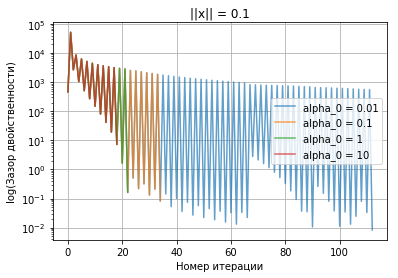

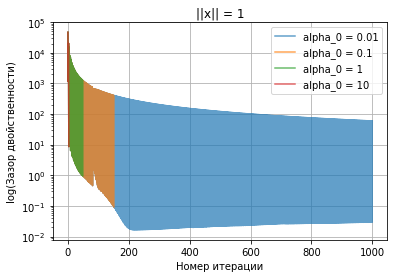

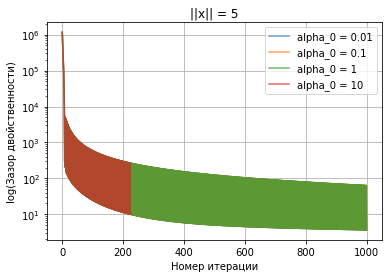

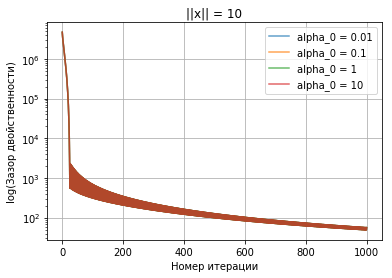

In [2]:
n = 1000 
m = 500

for_x_0_s = [0.1, 1, 5, 10]
alpha_0_s = [0.01, 0.1 , 1, 10]

A = np.random.rand(m, n)
b = np.zeros(m) 
x_0 = np.random.rand(n)

for distance in for_x_0_s:
    histories = []
    for alpha_0 in alpha_0_s:
        
        x_0 = x_0 / np.linalg.norm(x_0) * distance

        oracle = oracles.create_lasso_nonsmooth_oracle(A, b, regcoef=0.1)
        x_star, msg, history = optimization.subgradient_method(oracle, x_0, alpha_0, trace=True)
        histories.append(history)
    grid()
    yscale('log')
    title("||x|| = %s" %distance) 
    xlabel('Номер итерации')
    ylabel('log(Зазор двойственности)')
    for history, al in zip(histories, alpha_0_s):
        plot([i for i in range(0, len(history['duality_gap']))], history['duality_gap'], label='alpha_0 = %s'%al, alpha=0.7)
    legend()
    savefig("first" + str(distance) + ".png", dpi=300)
    show()

# Эксперимент 3.2: Среднее число итераций линейного поиска в схеме Нестерова

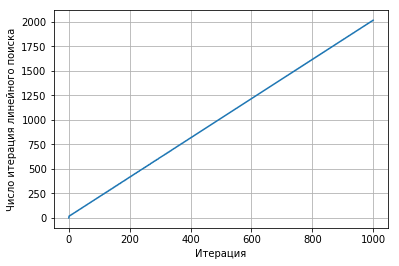

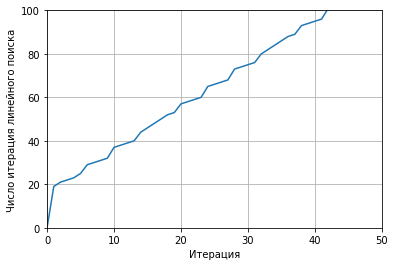

2.012987012987013


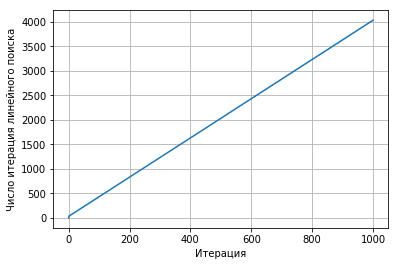

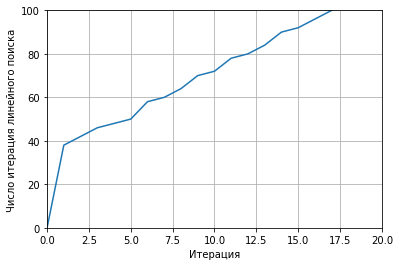

4.025974025974026


In [3]:
n = 1000
m = 1000

A = np.random.rand(m, n)
b = np.random.rand(m)
oracle = oracles.create_lasso_prox_oracle(A, b, regcoef=1)
x_0 = np.zeros(n)
indicator = 0

for method in [optimization.proximal_gradient_descent, optimization.accelerated_proximal_gradient_descent]:
    x_star, msg, history = method(oracle, x_0, trace=True)
    
    plot([i for i in range(0, len(history['duality_gap']))], history['linear_search_iterations'])
    grid()
    xlabel('Итерация')
    ylabel('Число итерация линейного поиска')
    show()
    
    plot([i for i in range(0, len(history['duality_gap']))], history['linear_search_iterations'])
    grid()
    xlabel('Итерация')
    ylabel('Число итерация линейного поиска')
    if indicator == 0:
        axis([0, 50, 0, 100])
        indicator += 1
    else: axis([0, 20, 0, 100])
    show()
    print(history["linear_search_iterations"][-1] / len(history["linear_search_iterations"]))

#  Эксперимент 3.3: Сравнение методов

## Зависимость от $n$:

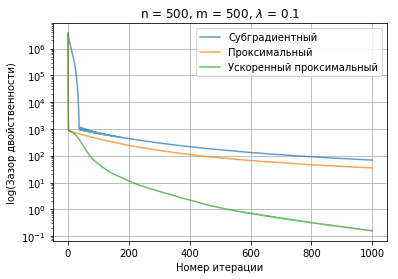

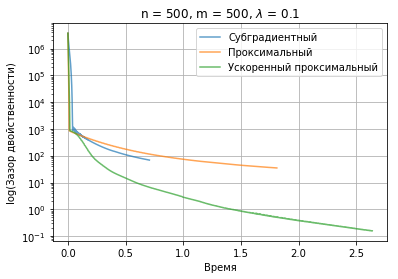

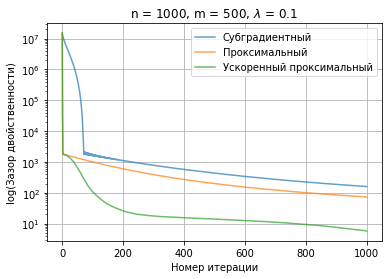

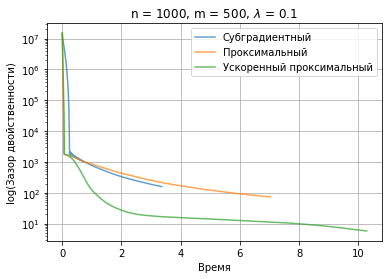

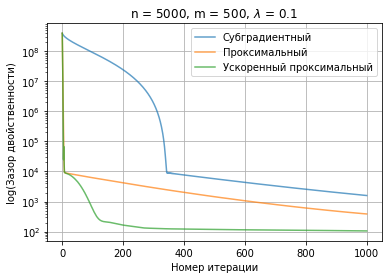

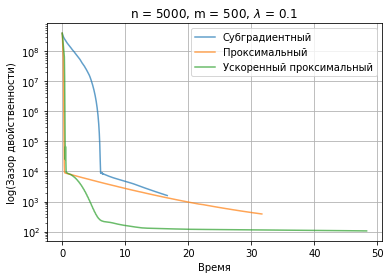

In [4]:
ns = [500, 1000, 5000]
m = 500
lamb = 0.1
for n in ns:
    histories = []
    
    A = np.random.rand(m, n)
    b = np.zeros(m) 
    x_0 = np.random.rand(n)
    
    oracle = oracles.create_lasso_nonsmooth_oracle(A, b, regcoef=lamb)
    x_star, msg, history = optimization.subgradient_method(oracle, x_0, trace=True)
    histories.append(history)

    
    oracle = oracles.create_lasso_prox_oracle(A, b, regcoef=lamb)
    
    x_star, msg, history = optimization.proximal_gradient_descent(oracle, x_0, trace=True)
    histories.append(history)
        
    x_star, msg, history = optimization.accelerated_proximal_gradient_descent(oracle, x_0, trace=True)
    histories.append(history)

    
    for history, typ in zip(histories, ['Субградиентный', 'Проксимальный', 'Ускоренный проксимальный']):
        plot([i for i in range(0, len(history['duality_gap']))], history['duality_gap'], label='%s'%typ, alpha=0.7)
    grid()
    yscale('log')
    title("n = %s, m = %s, $\lambda$ = %s" %(n, m, lamb)) 
    xlabel('Номер итерации')
    ylabel('log(Зазор двойственности)')    
    legend()
    savefig("Iter_dg" + str(n) + ".png", dpi=300)
    show()
    
    for history, typ in zip(histories, ['Субградиентный', 'Проксимальный', 'Ускоренный проксимальный']):
        plot(history["time"], history['duality_gap'], label='%s'%typ, alpha=0.7)
    grid()
    yscale('log')
    title("n = %s, m = %s, $\lambda$ = %s" %(n, m, lamb)) 
    xlabel('Время')
    ylabel('log(Зазор двойственности)')    
    legend()
    savefig("Time_dg" + str(n) + ".png", dpi=300)
    show()

# Зависимость от $m$:

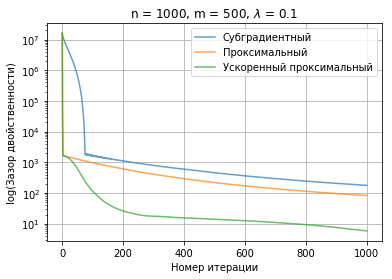

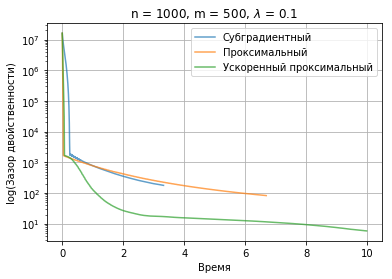

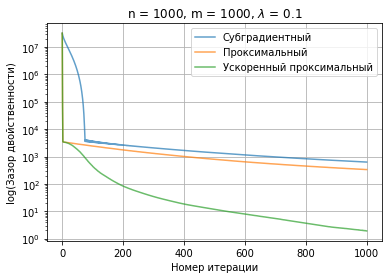

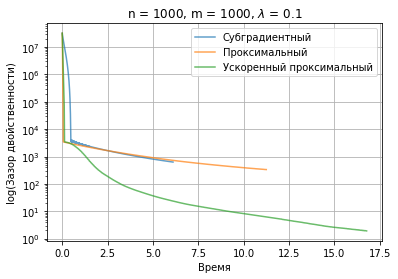

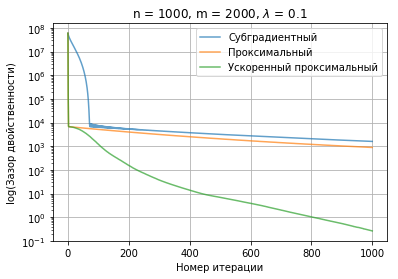

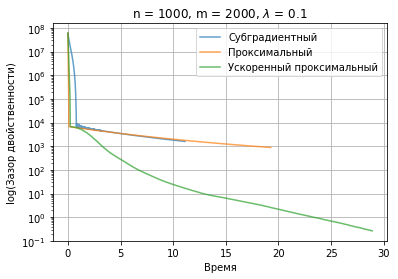

In [5]:
n = 1000
ms = [500, 1000, 2000]
lamb = 0.1
for m in ms:
    histories = []
    
    A = np.random.rand(m, n)
    b = np.zeros(m) 
    x_0 = np.random.rand(n)
    
    oracle = oracles.create_lasso_nonsmooth_oracle(A, b, regcoef=lamb)
    x_star, msg, history = optimization.subgradient_method(oracle, x_0, trace=True)
    histories.append(history)

    
    oracle = oracles.create_lasso_prox_oracle(A, b, regcoef=lamb)
    
    x_star, msg, history = optimization.proximal_gradient_descent(oracle, x_0, trace=True)
    histories.append(history)
        
    x_star, msg, history = optimization.accelerated_proximal_gradient_descent(oracle, x_0, trace=True)
    histories.append(history)

    
    for history, typ in zip(histories, ['Субградиентный', 'Проксимальный', 'Ускоренный проксимальный']):
        plot([i for i in range(0, len(history['duality_gap']))], history['duality_gap'], label='%s'%typ, alpha=0.7)
    grid()
    yscale('log')
    title("n = %s, m = %s, $\lambda$ = %s" %(n, m, lamb)) 
    xlabel('Номер итерации')
    ylabel('log(Зазор двойственности)')    
    legend()
    savefig("m_Iter_dg" + str(m)+ ".png", dpi=300)
    show()
    
    for history, typ in zip(histories, ['Субградиентный', 'Проксимальный', 'Ускоренный проксимальный']):
        plot(history["time"], history['duality_gap'], label='%s'%typ, alpha=0.7)
    grid()
    yscale('log')
    title("n = %s, m = %s, $\lambda$ = %s" %(n, m, lamb)) 
    xlabel('Время')
    ylabel('log(Зазор двойственности)')    
    legend()
    savefig("m_Time_dg" + str(m)+ ".png", dpi=300)
    show()

# Зависимость от $\lambda$:

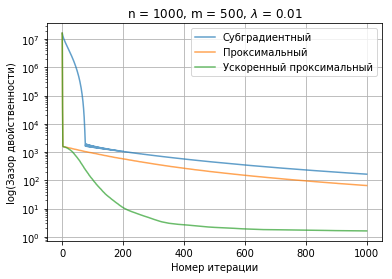

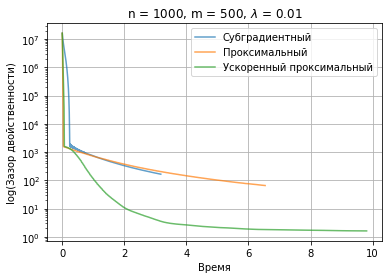

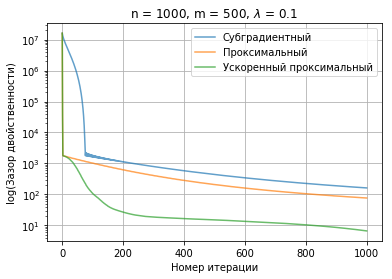

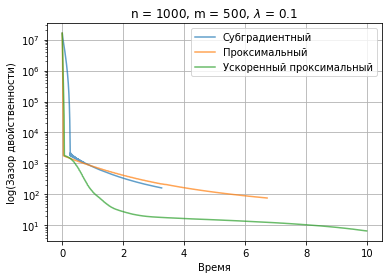

/home/calabaricus/vcOptim/task4/mine/oracles.py:186: RuntimeWarning: divide by zero encountered in double_scalars
  mu = min(1, regcoef / max(abs(ATAx_b))) * Ax_b


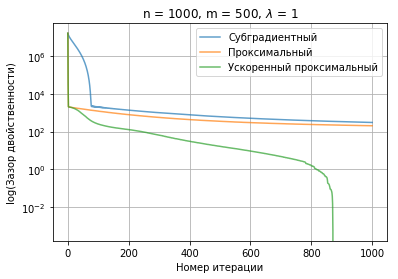

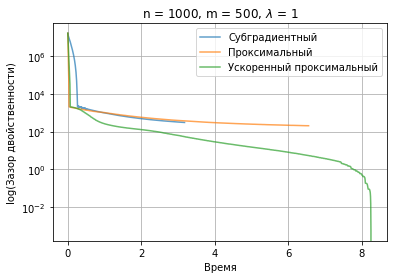

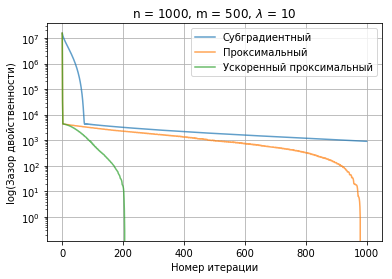

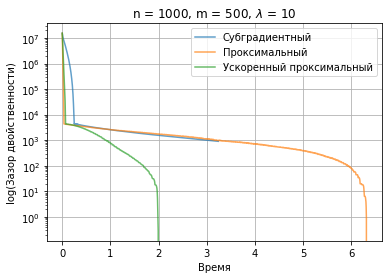

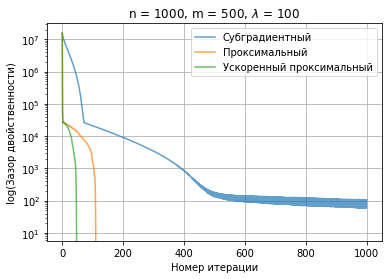

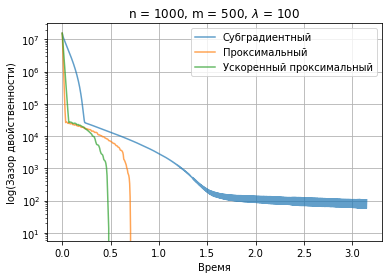

In [6]:
n = 1000
m = 500
lambdas = [0.01, 0.1, 1, 10, 100]
for lamb in lambdas:
    histories = []
    
    A = np.random.rand(m, n)
    b = np.zeros(m) 
    x_0 = np.random.rand(n)
    
    oracle = oracles.create_lasso_nonsmooth_oracle(A, b, regcoef=lamb)
    x_star, msg, history = optimization.subgradient_method(oracle, x_0, trace=True)
    histories.append(history)

    
    oracle = oracles.create_lasso_prox_oracle(A, b, regcoef=lamb)
    
    x_star, msg, history = optimization.proximal_gradient_descent(oracle, x_0, trace=True)
    histories.append(history)
        
    x_star, msg, history = optimization.accelerated_proximal_gradient_descent(oracle, x_0, trace=True)
    histories.append(history)

    
    for history, typ in zip(histories, ['Субградиентный', 'Проксимальный', 'Ускоренный проксимальный']):
        plot([i for i in range(0, len(history['duality_gap']))], history['duality_gap'], label='%s'%typ, alpha=0.7)
    grid()
    yscale('log')
    title("n = %s, m = %s, $\lambda$ = %s" %(n, m, lamb)) 
    xlabel('Номер итерации')
    ylabel('log(Зазор двойственности)')    
    legend()
    savefig("lam_Iter_dg" + str(lamb)+ ".png", dpi=300)
    show()
    
    for history, typ in zip(histories, ['Субградиентный', 'Проксимальный', 'Ускоренный проксимальный']):
        plot(history["time"], history['duality_gap'], label='%s'%typ, alpha=0.7)
    grid()
    yscale('log')
    title("n = %s, m = %s, $\lambda$ = %s" %(n, m, lamb)) 
    xlabel('Время')
    ylabel('log(Зазор двойственности)')    
    legend()
    savefig("lam_Time_dg" + str(lamb)+ ".png", dpi=300)
    show()